In [1]:
# methods3 conda environment
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [2]:
# common functions
def equalize_targets(data, y):
    np.random.seed(7)
    targets = np.unique(y)
    counts = list()
    indices = list()
    for target in targets:
        counts.append(np.sum(y == target))
        indices.append(np.where(y == target)[0])
    min_count = np.min(counts)
    first_choice = np.random.choice(indices[0], size=min_count, replace=False)
    second_choice = np.random.choice(indices[1], size=min_count, replace=False)
    third_choice = np.random.choice(indices[2], size=min_count, replace=False)
    fourth_choice = np.random.choice(indices[3], size=min_count, replace=False)
    
    new_indices = np.concatenate((first_choice, second_choice,
                                 third_choice, fourth_choice))
    new_y = y[new_indices]
    new_data = data[new_indices, :, :]
    
    return new_data, new_y

# Practical 10

## Exercise 1 - Use principal component analysis to improve the classification of subjective experience

### 1 - Create a covariance matrix, find the eigenvectors and the eigenvalues

1.i) Load megmag_data.npy and call it data using np.load. You can use join, which can be imported from os.path, to create paths from different string segments

In [3]:

data = np.load('megmag_data.npy')
pas_data = np.load('pas_vector.npy')

In [4]:
# 1.ii) Equalize the number of targets in y and data using equalize_targets
data, y = equalize_targets(data, pas_data)

In [7]:
# 1.iii) times
times=np.arange(-200, 804, 4) 
# 1.iii) reduce to two dimensions only using 248ms
data_reduced = data[:, :, np.where(times == 248)[0][0]]


In [8]:
# 1.iv) Scale the data using StandardScaler
sc = StandardScaler()
data_scaled = sc.fit_transform(data_reduced, y)


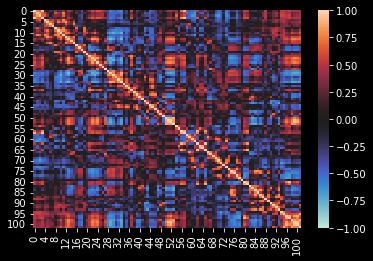

In [18]:
# 1.v) Calcolate the sample covariance matrix using np.cov
cov_matrix = np.cov(data_scaled, rowvar=False)
# plot using seaborn heatmap
sns.heatmap(cov_matrix, cmap='icefire', vmin=-1, vmax=1)
plt.show()

#### 1.vi) What does the off-diagonal activation imply about the independence of the signals measured by the 102 sensors?

In [20]:
# 1.vii Run np.linalg.matrix_rank on the covariance matrix - what integer value do you get? (we'll use this later)
rank = np.linalg.matrix_rank(cov_matrix)
print("Matrix rank: {}".format(rank))

Matrix rank: 97


In [21]:
# 1.viii) Find the eigenvalues and eigenvectors of the covariance matrix using np.linalg.eig
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# Use np.real to retrieve only the real parts of the eigenvalues
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)


2 - Create the weighting matrix W and the projected data, Z

In [22]:
# 2.i to 2.iii) sort the eigenvectors and eigenvalues according to the absolute values of the eigenvalues
# get the sorted indices of absolute values in reverse order
sorted_indices = np.argsort(np.abs(eigenvalues))[::-1]
# sorted eigenvalues
eigenvalues = eigenvalues[sorted_indices]
# sorted eigenvectors
eigenvectors = eigenvectors[:, sorted_indices]


C:\Users\webma\AppData\Local\Temp/ipykernel_19644/3870441425.py:2: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(eigenvalues), 'o')


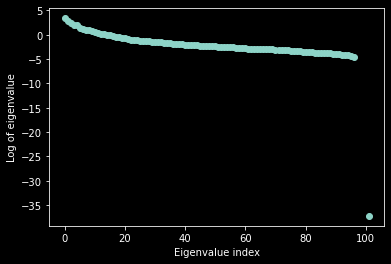

In [23]:
# 2.iv) Plot the log of the eigenvalues
plt.plot(np.log(eigenvalues), 'o')
plt.xlabel('Eigenvalue index')
plt.ylabel('Log of eigenvalue')
plt.show()


In [25]:
# 2.v - 2.vi) eigenvectors are the weighting matrix, create projected data Z = W.X
Z = data_scaled @ eigenvectors
X = Z @ eigenvectors.T

# check if calculations are correct
np.isclose(data_scaled, X)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

(396, 102)


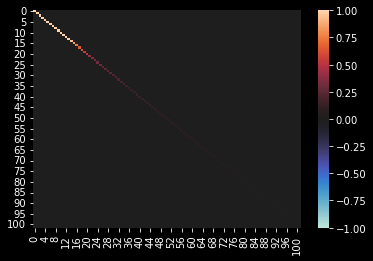

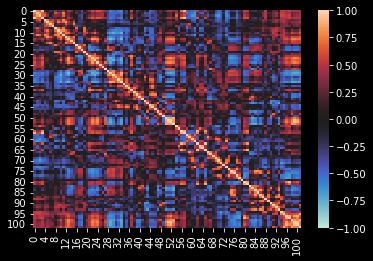

In [31]:
# 2.vii) Create a new covariance matrix of the principal components (n=102)
cov_matrix_pca = np.cov(Z, rowvar=False)
print(Z.shape)
# plot using seaborn heatmap
sns.heatmap(cov_matrix_pca, cmap='icefire', vmin=-1, vmax=1)
plt.show()

# original plot again for comparison
sns.heatmap(cov_matrix, cmap='icefire', vmin=-1, vmax=1)
plt.show()